In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [6]:
df=pd.read_csv('insurance.csv')

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [8]:
df.shape

(1338, 8)

In [9]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [11]:
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [12]:
s = df['bmi']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [13]:
print(len(outliers))

9


In [14]:
a=list(outliers.keys())
df.drop(a,inplace=True)

In [15]:
s = df['charges']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers1=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [16]:
print(len(outliers1))

138


In [17]:
b=list(outliers1.keys())
df.drop(b,inplace=True)

In [18]:
df.shape

(1191, 8)

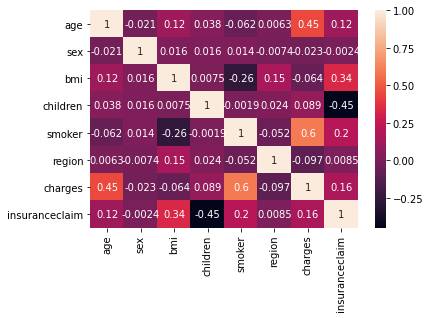

In [19]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [20]:
X=df.drop('insuranceclaim',axis=1)
Y=df['insuranceclaim']

In [21]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [22]:
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [24]:
ss=StandardScaler()

In [25]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [26]:
def create_model(model):
    model.fit(X_train_ss,Y_train)
    Y_pred=model.predict(X_test_ss)
    print(classification_report(Y_test,Y_pred))

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr=LogisticRegression()

In [29]:
create_model(lr)

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       162
           1       0.89      0.87      0.88       196

    accuracy                           0.87       358
   macro avg       0.87      0.87      0.87       358
weighted avg       0.87      0.87      0.87       358



In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt=DecisionTreeClassifier()

In [32]:
create_model(dt)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       162
           1       0.97      0.98      0.97       196

    accuracy                           0.97       358
   macro avg       0.97      0.97      0.97       358
weighted avg       0.97      0.97      0.97       358



In [41]:
dt1=DecisionTreeClassifier(max_depth=8)
dt2=DecisionTreeClassifier(min_samples_leaf=50)
dt3=DecisionTreeClassifier(min_samples_leaf=50,criterion="entropy")

In [42]:
create_model(dt1)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       162
           1       0.98      0.97      0.98       196

    accuracy                           0.97       358
   macro avg       0.97      0.97      0.97       358
weighted avg       0.97      0.97      0.97       358



In [43]:
create_model(dt2)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       162
           1       0.88      0.80      0.83       196

    accuracy                           0.83       358
   macro avg       0.83      0.83      0.83       358
weighted avg       0.83      0.83      0.83       358



In [44]:
create_model(dt3)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       162
           1       0.88      0.80      0.83       196

    accuracy                           0.83       358
   macro avg       0.83      0.83      0.83       358
weighted avg       0.83      0.83      0.83       358



In [45]:
from sklearn.svm import LinearSVC
svc=LinearSVC(random_state=1)
svc1=LinearSVC(random_state=1,C=0.5)

In [46]:
create_model(svc)

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       162
           1       0.89      0.88      0.88       196

    accuracy                           0.87       358
   macro avg       0.87      0.87      0.87       358
weighted avg       0.87      0.87      0.87       358



In [47]:
create_model(svc1)

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       162
           1       0.89      0.88      0.88       196

    accuracy                           0.87       358
   macro avg       0.87      0.87      0.87       358
weighted avg       0.87      0.87      0.87       358



In [48]:
from sklearn.svm import SVC
svc2=SVC(random_state=1,kernel="poly")
svc3=SVC(random_state=1,kernel="rbf")

In [49]:
create_model(svc2)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       162
           1       0.94      0.84      0.89       196

    accuracy                           0.88       358
   macro avg       0.88      0.89      0.88       358
weighted avg       0.89      0.88      0.88       358



In [50]:
create_model(svc3)

              precision    recall  f1-score   support

           0       0.84      0.94      0.88       162
           1       0.94      0.85      0.89       196

    accuracy                           0.89       358
   macro avg       0.89      0.89      0.89       358
weighted avg       0.89      0.89      0.89       358



In [51]:
from sklearn.naive_bayes import GaussianNB
gs=GaussianNB()
from sklearn.naive_bayes import BernoulliNB
be=BernoulliNB()

In [52]:
create_model(gs)

              precision    recall  f1-score   support

           0       0.68      0.86      0.76       162
           1       0.85      0.66      0.74       196

    accuracy                           0.75       358
   macro avg       0.77      0.76      0.75       358
weighted avg       0.77      0.75      0.75       358



In [53]:
create_model(be)

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       162
           1       0.78      0.79      0.79       196

    accuracy                           0.77       358
   macro avg       0.76      0.76      0.76       358
weighted avg       0.77      0.77      0.77       358



In [54]:
import math
math.sqrt(len(Y_test))

18.920887928424502

In [55]:
from sklearn.neighbors import KNeighborsClassifier
cls=KNeighborsClassifier(n_neighbors=19)

In [56]:
create_model(cls)

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       162
           1       0.85      0.84      0.84       196

    accuracy                           0.83       358
   macro avg       0.83      0.83      0.83       358
weighted avg       0.83      0.83      0.83       358



In [57]:
from sklearn.ensemble import BaggingClassifier
bc1=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=10,random_state=1)
bc2=BaggingClassifier(LogisticRegression(),n_estimators=10,max_samples=10,random_state=1,bootstrap=False)

In [58]:
create_model(bc1)

              precision    recall  f1-score   support

           0       0.82      0.51      0.63       162
           1       0.69      0.91      0.78       196

    accuracy                           0.73       358
   macro avg       0.75      0.71      0.71       358
weighted avg       0.75      0.73      0.71       358



In [59]:
create_model(bc2)

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       162
           1       0.87      0.77      0.82       196

    accuracy                           0.81       358
   macro avg       0.81      0.82      0.81       358
weighted avg       0.82      0.81      0.81       358



In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=1)

In [63]:
create_model(rfc)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       162
           1       0.96      0.93      0.94       196

    accuracy                           0.94       358
   macro avg       0.94      0.94      0.94       358
weighted avg       0.94      0.94      0.94       358



In [64]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier(n_estimators=100)

In [65]:
create_model(ada)

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       162
           1       0.84      0.86      0.85       196

    accuracy                           0.84       358
   macro avg       0.83      0.83      0.83       358
weighted avg       0.84      0.84      0.84       358



In [66]:
create_model(gbc)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       162
           1       0.98      0.95      0.97       196

    accuracy                           0.96       358
   macro avg       0.96      0.97      0.96       358
weighted avg       0.96      0.96      0.96       358



In [67]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=100,reg_alpha=1)

In [68]:
create_model(xgb)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       162
           1       0.98      0.96      0.97       196

    accuracy                           0.97       358
   macro avg       0.97      0.97      0.97       358
weighted avg       0.97      0.97      0.97       358

